## DRAGON REAL ESTATE - PRICE PREDICTOR

## Import the necessary Libraries and load the Dataset

In [1]:
# Import pandas library (for data manipulation and analysis)
import pandas as pd

In [2]:
# Read the CSV file named "data.csv" into a DataFrame named `housing`
housing = pd.read_csv("data.csv")

In [3]:
# Display the first few rows (default 5) of the DataFrame to get a quick preview of the data
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Get info about data types, non-null counts, memory usage
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Explore distribution of a categorical/indicator column “CHAS”
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
# Summary statistics for numeric columns
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# Prepare for plotting inline
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

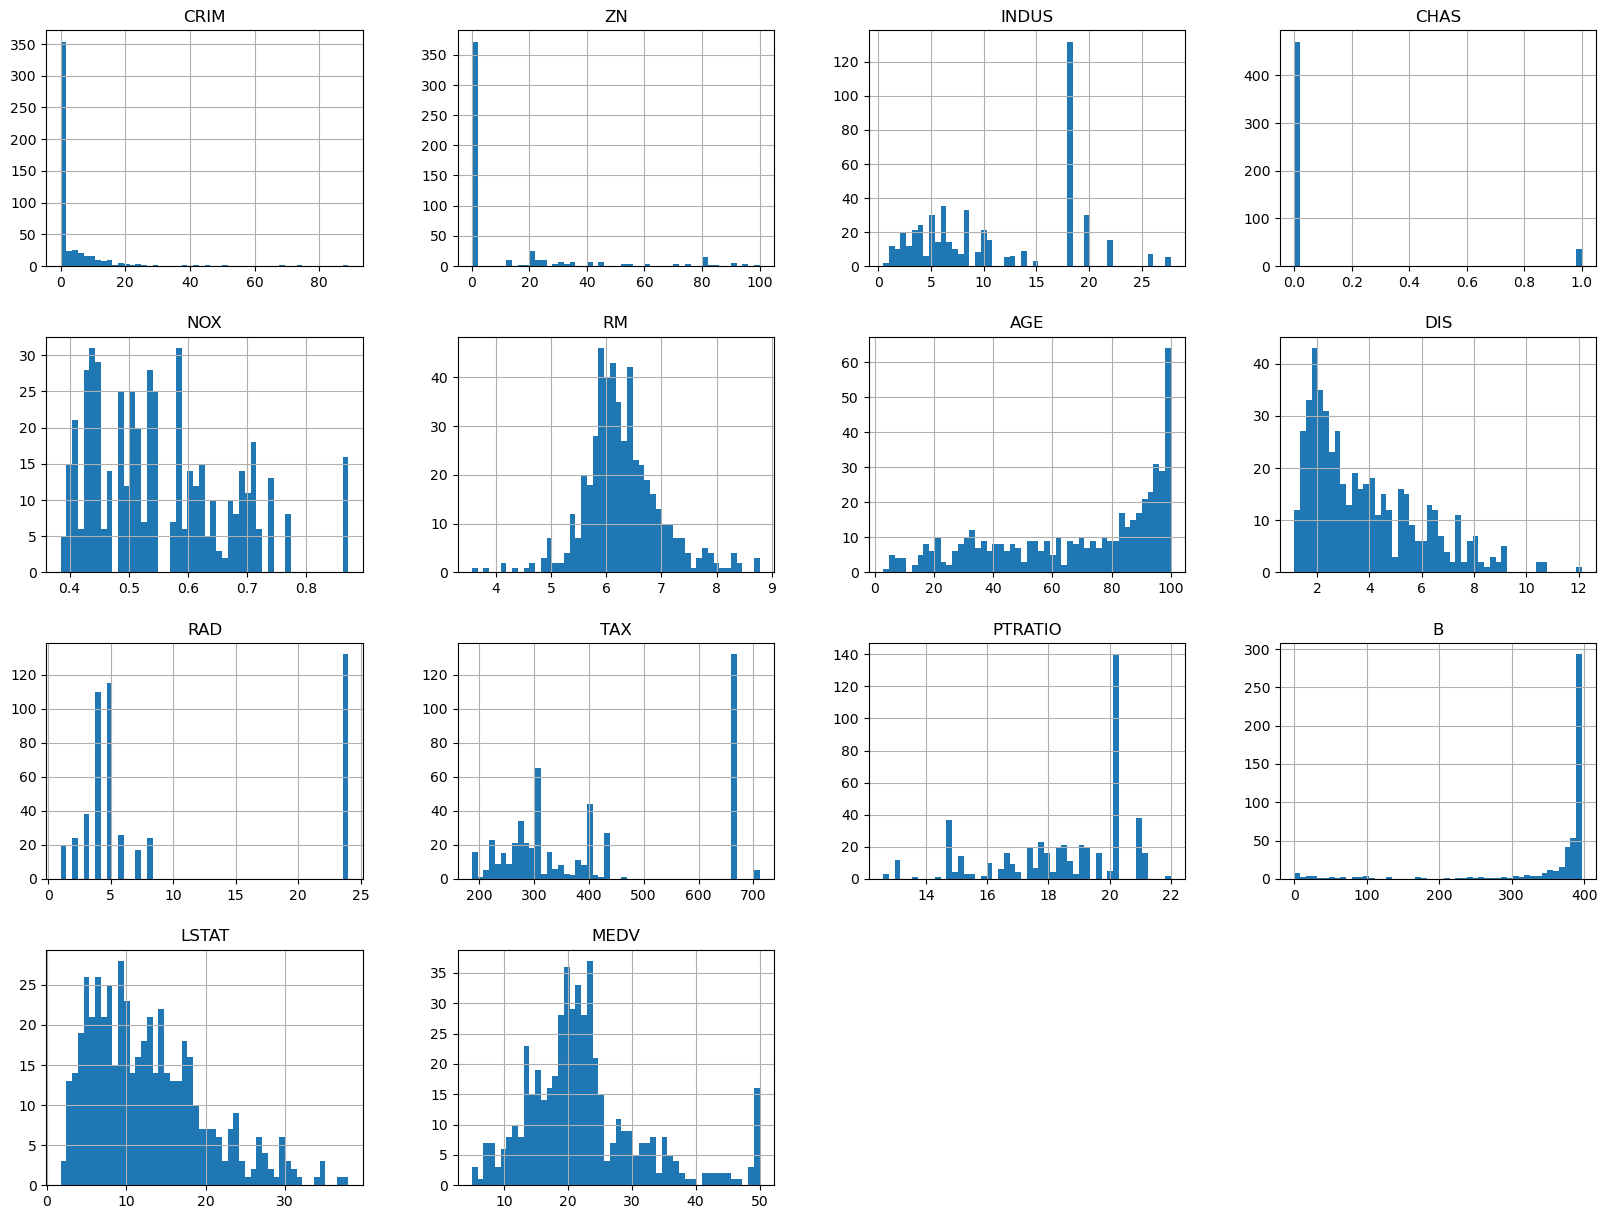

In [8]:
# Matplotlib is core plotting library in Python
import matplotlib.pyplot as plt
# Plot histograms for all numerical columns
housing.hist(bins=50, figsize = (20,15))
#   → This draws a histogram (distribution) of each numeric feature in its own subplot.
#      - `bins=50` divides data range into 50 intervals (bins)  
#      - `figsize=(20,15)` makes the figure large so plots are readable  
#      - A histogram helps us see the shape of distribution (skew, tails, outliers) for each feature  
#      - This is part of Exploratory Data Analysis (EDA)

## Train Test Splitting

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# === Custom function: simple random train-test split ===
def split_train_test(data, test_ratio):
    """Split a DataFrame into train and test sets (randomly, without stratification)."""
    np.random.seed(42)  # fix random seed for reproducibility
    shuffled = np.random.permutation(len(data))  
    # np.random.permutation returns a permutation of indices [0 .. len(data)-1]
    print(shuffled)  
    test_set_size = int(len(data) * test_ratio)  
    # Number of instances to put in test set
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    # Use iloc to select by integer-location based indices
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
## train_set, test_set = split_train_test(housing,0.2)

In [11]:
## print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
# === Better approach: using scikit-learn’s train_test_split ===
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [13]:
# === Stratified sampling based on a categorical (or discrete) feature ===
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # number of re-shuffling & splitting iterations
# Yields train / test indices based on stratification
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [14]:
strat_test_set # show test subset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB


In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [19]:
# 95/7

In [20]:
# 376/28

In [21]:
 # Replace the original housing data with stratified train set (for further preprocessing)
housing = strat_train_set.copy()

## Looking for Correlations

In [22]:
# Compute pairwise correlation coefficients between all numeric features
corr_matrix = housing.corr()
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.212927  0.416640 -0.061482  0.430879 -0.257663  0.361890   
ZN      -0.212927  1.000000 -0.542161 -0.023536 -0.509327  0.292252 -0.565680   
INDUS    0.416640 -0.542161  1.000000  0.043686  0.759051 -0.385324  0.644114   
CHAS    -0.061482 -0.023536  0.043686  1.000000  0.077490  0.100385  0.058388   
NOX      0.430879 -0.509327  0.759051  0.077490  1.000000 -0.300860  0.727358   
RM      -0.257663  0.292252 -0.385324  0.100385 -0.300860  1.000000 -0.241318   
AGE      0.361890 -0.565680  0.644114  0.058388  0.727358 -0.241318  1.000000   
DIS     -0.386900  0.666939 -0.708612 -0.088081 -0.763623  0.204159 -0.734827   
RAD      0.648221 -0.306480  0.580908 -0.023005  0.596012 -0.200095  0.449489   
TAX      0.603934 -0.322803  0.716288 -0.048802  0.659049 -0.282449  0.501491   
PTRATIO  0.305603 -0.390570  0.384465 -0.132682  0.164977 -0.331544  0.259633   
B       -0.486869  0.188575 

In [23]:
# Look at how features correlate with the target “MEDV” (Median value of homes, assuming Boston housing-type dataset)
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

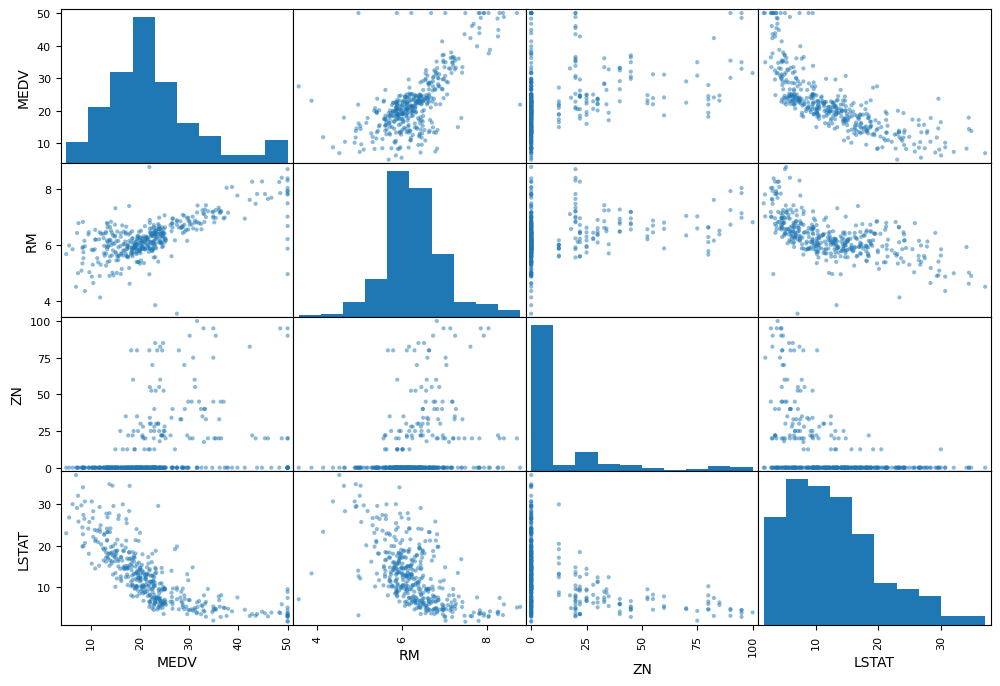

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
# Create scatter plots between pairs of the selected attributes
#   → Each pair of attributes gets a scatter plot; diagonal shows histogram of each attribute
#   → Good for visually exploring relationships, looking for linear patterns, outliers, etc.
scatter_matrix(housing[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

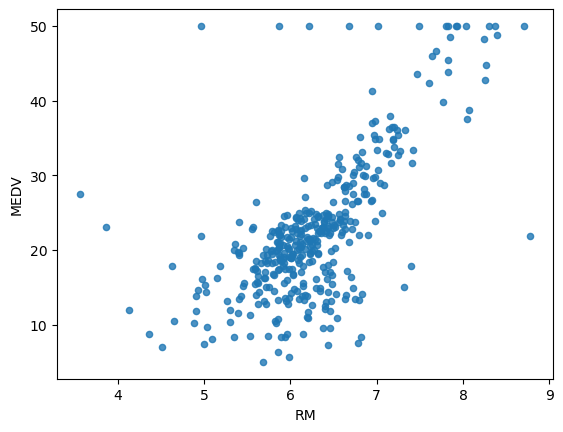

In [25]:
# Plot a scatter plot of “RM” vs “MEDV” to inspect their relationship more closely
#   → alpha=0.8 makes points slightly transparent so overlapping points can be seen
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Out Attribute Combinations

In [26]:
# Create a new feature “TAXRM” as the ratio of TAX to RM
housing["TAXRM"] = housing ['TAX']/housing['RM']

In [27]:
# Preview first few rows again, now including the new column TAXRM
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
# Check data types, non-null counts, etc. To confirm that TAXRM was created correctly and has no issues (e.g. division by zero)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [29]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.528626
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

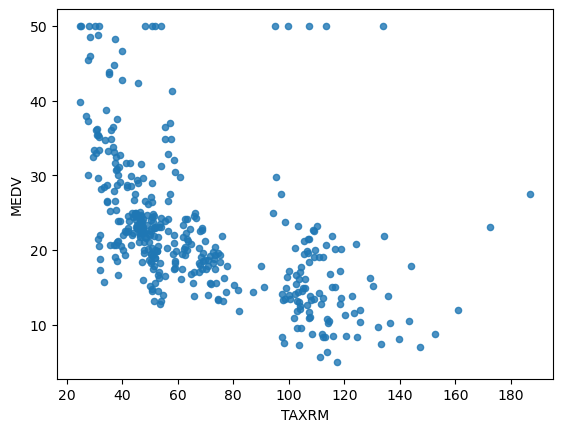

In [30]:
# Plot scatter of new feature TAXRM vs target MEDV to inspect its relationship
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [31]:
# Now preparing for modeling: split features vs target
housing = strat_train_set.drop("MEDV", axis=1)
# Remove the target column from the training features set
housing_labels = strat_train_set["MEDV"].copy()
# Save the target values (MEDV) in a separate variable (copy to avoid modifying the original)

## Missing Attributes

In [32]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the value to some value(0, mean or median)

In [33]:
# Drop data points (rows) where the “RM” attribute is missing
a = housing.dropna(subset=["RM"])  # drops any row where RM is NaN
a.shape  # inspect the resulting shape (rows, columns)

(399, 13)

In [34]:
# Drop the whole attribute (column) “RM” entirely
housing.drop("RM", axis=1).shape  
# This returns a new DataFrame without the “RM” column.  

(404, 12)

In [35]:
# Fill (impute) missing values with a specific value (mean, median, zero, etc.)
median = housing["RM"].median()  # compute the median of the “RM” column (ignoring NaNs)

In [36]:
 # returns a new Series / DataFrame with NaNs filled
housing["RM"].fillna(median) 

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape

(404, 13)

In [38]:
# describe summary statistics before permanent imputation
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [39]:
from sklearn.impute import SimpleImputer
# Create an imputer object that will replace missing values using the median of the column
imputer = SimpleImputer(strategy="median")
# “Fit” the imputer on the housing data — it computes the median for each column
imputer.fit(housing)

SimpleImputer(strategy='median')

In [40]:
# After fitting, the imputer stores the medians (or statistics) for each column
# array of medians (one per column)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [41]:
# Transform the dataset: replace missing values with the computed medians
X = imputer.transform(housing)  
# The result is a Numpy 2D array (no longer a DataFrame), where missing values are replaced
# inspect the transformed array
print(X) 

[[4.81900e-02 8.00000e+01 3.64000e+00 ... 1.64000e+01 3.92890e+02
  6.57000e+00]
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [4.87141e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96210e+02
  1.86800e+01]
 ...
 [8.18700e-02 0.00000e+00 2.89000e+00 ... 1.80000e+01 3.93530e+02
  3.57000e+00]
 [4.75237e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 5.09200e+01
  1.81300e+01]
 [4.56000e-02 0.00000e+00 1.38900e+01 ... 1.64000e+01 3.92800e+02
  1.35100e+01]]


In [42]:
# Convert back from Numpy array to pandas DataFrame, preserving column names
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [43]:
# summary statistics after imputation
housing_tr.describe()
# this is the logic of StandardScaler Scaling that I have done below
# Demonstration: how StandardScaler works (manual logic)
# a=housing_tr['CRIM'].mean()
# b=housing_tr['CRIM'].std()
# print(a,'  ',b)

# d=housing_tr['CRIM'][1]
# print(d)
# ans=(d-a)/b
# print(ans)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-Learn Design

In [44]:
# Primarily, three types of objects:-
# 1) Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters
# 2) Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
# 3) Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions. 

## Feature Scaling

In [45]:
# Primarily, two types of feature scaling methods:-
# 1) Min-max scaling: (Normalization) (value - min)/(max - min) 
# Sklearn provides a class called MinMaxScaler for this
# 2) Standardization: (value - mean)/std 
# Sklearn provides a class called StandardScaler for this
# These are done for every columns of the dataframe or array

## Creating A Pipeline

In [46]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Define the pipeline
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [47]:
# Apply the pipeline to the housing data
housing_num_tr = my_pipeline.fit_transform(housing)

In [48]:
# Inspect the shape of the transformed data
housing_num_tr.shape

(404, 13)

In [49]:
# Print the transformed data
# Outputs the transformed data as a NumPy array
print(housing_num_tr)

[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


## Selecting a desired model

In [50]:
# Import necessary regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [51]:
# Select a subset of the data (first 5 rows) for prediction
some_data = housing.iloc[:5]
# Display the selected data
print(some_data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   

     PTRATIO       B  LSTAT  
254     16.4  392.89   6.57  
348     17.0  390.94   5.99  
476     20.2  396.21  18.68  
321     19.6  396.90   6.87  
326     19.6  396.90   6.15  


In [52]:
# Extract the corresponding labels (target values) for the selected data
some_labels = housing_labels.iloc[:5]
# Display the corresponding labels
print(some_labels)

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64


In [53]:
# Transform the selected data using the same preprocessing pipeline
prepared_data = my_pipeline.transform(some_data)
# Display the transformed data
print(prepared_data)

[[-0.43942006  3.12628155 -1.12165014 -0.27288841 -1.42262747 -0.23979304
  -1.31238772  2.61111401 -1.0016859  -0.5778192  -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 -0.27288841 -1.0542567   0.5009123
  -1.3938808   2.19312325 -0.65766683 -0.78557904 -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 -0.27288841  0.47919371  0.28867984
   0.87020968 -0.68730678  1.63579367  1.50571521  0.81196637  0.44624347
   0.81480158]
 [-0.42292925 -0.4898311  -0.57719868 -0.27288841 -0.5573845   0.13688444
  -0.52225911  0.37882487 -0.5429938  -0.74402708  0.52982668  0.45343469
  -0.81939807]
 [-0.40786253 -0.4898311  -0.57719868 -0.27288841 -0.5573845   0.04693161
  -1.42222622  0.79643404 -0.5429938  -0.74402708  0.52982668  0.45343469
  -0.91902752]]


In [54]:
model.predict(prepared_data)

array([22.355, 25.31 , 16.506, 23.42 , 23.55 ])

In [55]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating The Model

In [56]:
from sklearn.metrics import mean_squared_error
# Predicting on the training set
housing_predictions = model.predict(housing_num_tr)
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(housing_labels, housing_predictions)
# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [57]:
rmse

np.float64(1.2295041301031047)

## Using better evaluation method: Cross Validation

In [58]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
# Performing 10-fold cross-validation
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
# Converting negative MSE to RMSE
rmse_scores = np.sqrt(-scores)

In [59]:
rmse_scores

array([2.85322049, 2.6798121 , 4.34956522, 2.80768267, 3.60513633,
       2.7152002 , 4.40076072, 3.33185277, 3.24217556, 3.29257359])

In [60]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [61]:
print_scores(rmse_scores)

Scores: [2.85322049 2.6798121  4.34956522 2.80768267 3.60513633 2.7152002
 4.40076072 3.33185277 3.24217556 3.29257359]
Mean:  3.3277979643466344
Standard deviation:  0.5976343170919832


## Saving the Model

In [62]:
from joblib import dump, load
dump(model, 'Dragon.joblib') 

['Dragon.joblib']

## Testing the model on test data

In [63]:
# Prepare the test data
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
# Apply the same preprocessing pipeline
X_test_prepared = my_pipeline.transform(X_test)
# Make predictions
final_predictions = model.predict(X_test_prepared)
# Calculate Mean Squared Error (MSE)
final_mse = mean_squared_error(Y_test, final_predictions)
# Calculate Root Mean Squared Error (RMSE)
final_rmse = np.sqrt(final_mse)
# Display
print(final_predictions, list(Y_test))

[24.652 11.535 25.099 22.032 18.648 14.838 20.592 14.257 32.488 42.352
 19.515 11.764 25.393 27.173 19.511 11.323 32.226 14.635 23.782 17.986
 19.886 17.425 17.377 22.053 18.463 30.785 15.954 32.981  8.768 34.185
 23.847 21.552 23.14  10.757 21.045 11.134 43.946 24.457 23.276 42.311
 24.012 30.931 20.65  20.688 18.512 33.447 44.751 20.383 20.615 21.936
 21.414 14.609 21.276 14.832 24.728 32.916 41.82  29.779 19.825 20.986
 47.043 10.121 19.188 26.311 14.785 33.13  20.309 17.672 18.926 33.681
 26.693 22.906 21.32  22.581 34.638 12.881 15.764 20.113 20.748 21.468
 22.655 21.179 13.993 23.064 20.462 21.362 14.21  21.531 21.618 23.383
 18.667 26.55   7.138 26.432 18.991 29.47  19.617 31.494 14.442 26.391
 21.315 20.636] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [64]:
final_rmse

np.float64(2.951912535568602)

In [65]:
prepared_data 

array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
        -0.23979304, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
        -0.97491834,  0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
         0.5009123 , -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
        -0.69277865,  0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, -0.27288841,  0.47919371,
         0.28867984,  0.87020968, -0.68730678,  1.63579367,  1.50571521,
         0.81196637,  0.44624347,  0.81480158],
       [-0.42292925, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.13688444, -0.52225911,  0.37882487, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.81939807],
       [-0.40786253, -0.4898311 , -0.57719868, -0.27288841, -0.5573845 ,
         0.04693161, -1.42222622,  0.79643404, -0.5429938 , -0.74402708,
         0.52982668,  0.45343469, -0.91902752]])

## Using the Model

In [66]:
from joblib import load
import numpy as np
# Load the pre-trained model
model = load('Dragon.joblib')  # Just load one object
# Data to predict
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
                      -11.44443979304, -49.31238772,  7.61111401, -26.0016879, -0.5778192,
                      -0.97491834, 0.41164221, -66.86091034]])
# Make predictions using the loaded model
prediction = model.predict(features)
# Display
print(prediction)

[24.464]


In [67]:
# New data to predict
a = np.array([[4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68]])
# Apply the same preprocessing pipeline used during training
X_test_prepared = my_pipeline.transform(a)
print(X_test_prepared)
final_predictions = model.predict(X_test_prepared)
print(final_predictions)

[[ 0.15682292 -0.4898311   0.98336806 -0.27288841  0.47919371  0.28867984
   0.87020968 -0.68730678  1.63579367  1.50571521  0.81196637  0.44624347
   0.81480158]]
[16.506]


C:\Users\SYED SARAFEENA ALI\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
